In [28]:
# Importing libraries to create choropleth maps

import shapely                 
from shapely.wkt import loads  
import geopandas as gpd
import pandas as pd            
import numpy as np
import matplotlib.pyplot as plt  
import palettable.colorbrewer.sequential as pcs
import seaborn as sb  
import statsmodels as sm
import statsmodels.formula.api as smf


In [49]:
# Read data from a CSV file into a DataFrame

lsoa_df = pd.read_csv('merged_file.csv')


In [50]:
# Convert the DataFrame to a GeoDataFrame
lsoa_df = gpd.GeoDataFrame(lsoa_df)
# Convert the 'geometry' column to Shapely geometries
lsoa_df['geometry'] = lsoa_df['geometry'].apply(lambda x: loads(x))
# Set the 'geometry' column as the active geometry column for the GeoDataFrame
lsoa_df = lsoa_df.set_geometry('geometry')

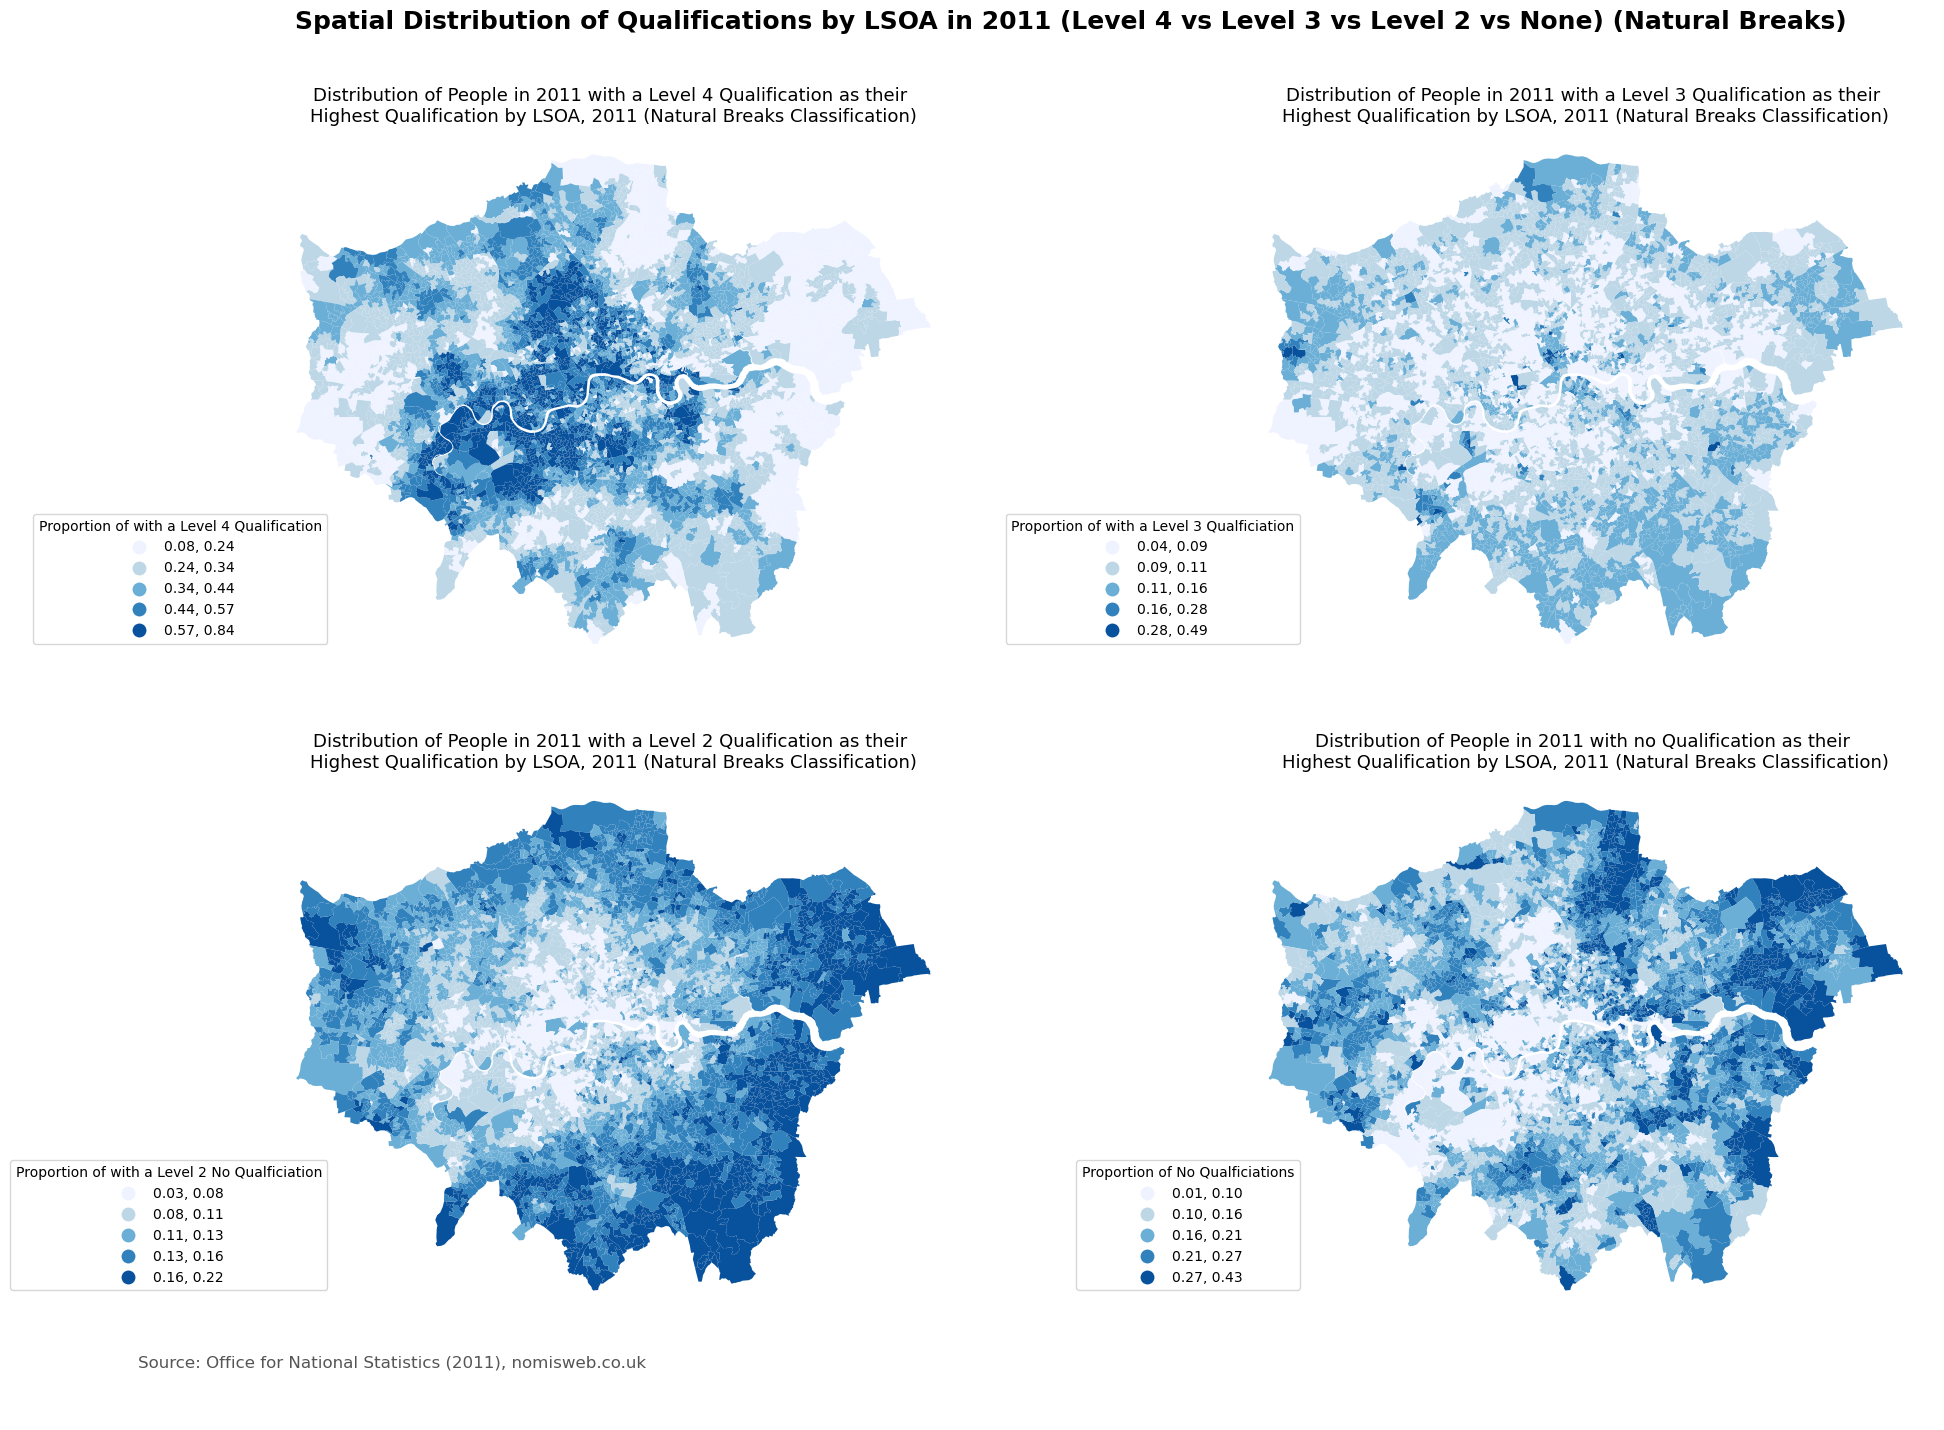

In [118]:
fig, ((ax,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(23, 15)) # Create a subplot with 2x2 axes
fig.suptitle("Spatial Distribution of Qualifications by LSOA in 2011 (Level 4 vs Level 3 vs Level 2 vs None) (Natural Breaks)",fontsize=18,fontweight="bold") # Setting the title for the entire figure
fig.subplots_adjust(top=0.9) # Adjust the top spacing of the figure

# Plot the data for 'prop_qual_4' in the first subplot
ax = lsoa_df.plot(column = "prop_qual_4",
scheme="NaturalBreaks",
ax = ax,
legend=True, legend_kwds={"title": "Proportion of with a Level 4 Qualification", "bbox_to_anchor": (0.1,0.3)},
cmap=pcs.Blues_5.mpl_colormap,
linewidth=10,
figsize=(10,10),)

# Plot the data for 'prop_qual_3' in the second subplot
lsoa_df.plot(column = "prop_qual_3",
scheme="NaturalBreaks",
ax = ax1,
legend=True, legend_kwds={"title": "Proportion of with a Level 3 Qualficiation", "bbox_to_anchor": (0.1,0.3)},
cmap=pcs.Blues_5.mpl_colormap,
linewidth=10,
figsize=(10,10),)

# Plot the data for 'prop_qual_2' in the third subplot
lsoa_df.plot(column = "prop_qual_2",
scheme="NaturalBreaks",
ax = ax2,
legend=True, legend_kwds={"title": "Proportion of with a Level 2 No Qualficiation", "bbox_to_anchor": (0.1,0.3)},
cmap=pcs.Blues_5.mpl_colormap,
linewidth=10,
figsize=(10,10),)

# Plot the data for 'prop_no_qual' in the fourth subplot
lsoa_df.plot(column = "prop_no_qual",
scheme="NaturalBreaks",
ax = ax3,
legend=True, legend_kwds={"title": "Proportion of No Qualficiations", "bbox_to_anchor": (0.1,0.3)},
cmap=pcs.Blues_5.mpl_colormap,
linewidth=10,
figsize=(10,10),)

# Turn off the axes for all subplots
ax.set_axis_off()
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
# Set titles for each subplot
ax.set_title("Distribution of People in 2011 with a Level 4 Qualification as their \nHighest Qualification by LSOA, 2011 (Natural Breaks Classification)",fontsize=13)
ax1.set_title("Distribution of People in 2011 with a Level 3 Qualification as their \nHighest Qualification by LSOA, 2011 (Natural Breaks Classification)",fontsize=13)
ax2.set_title("Distribution of People in 2011 with a Level 2 Qualification as their \nHighest Qualification by LSOA, 2011 (Natural Breaks Classification)",fontsize=13)
ax3.set_title("Distribution of People in 2011 with no Qualification as their \nHighest Qualification by LSOA, 2011 (Natural Breaks Classification)",fontsize=13)

# Annotate data sources
ax1.annotate("Source: Office for National Statistics (2011), nomisweb.co.uk",
            xy=(0.06,0.05), xycoords="figure fraction",
            horizontalalignment="left",verticalalignment="top",
            fontsize=12, color="#555555")   

# Save the figure as an image file
plt.savefig("mychoroplethmap",dpi=300,
           bbox_inches="tight",
           facecolor="white")          